Task 6: Threshold Tuning and Probability Interpretation ● Predict the probability of the positive class. ● Change the threshold (e.g., 0.3, 0.5, 0.7) and observe how the confusion matrix and F1-score change. ● Plot the ROC curve and mark optimal threshold.

In [1]:
# Step 1: Train Logistic Regression and Predict Probabilities

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # probabilities for class 1 (benign)
#Step 2: Change Thresholds and See Confusion Matrix & F1-score

def new_threshold(threshold):
    y_probs_new=(y_probs>=threshold).astype(int)
    matrix=confusion_matrix(y_test,y_probs_new)
    f1=f1_score(y_test,y_probs_new)
    print(f"\nThreshold: {threshold}")
    print("Confusion Matrix:\n", matrix)
    print("F1 Score:", f1)
    print("Classification Report:\n", classification_report(y_test, y_probs_new))

for t in [0.3, 0.5, 0.7]:
    new_threshold(t)


Threshold: 0.3
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1 Score: 0.9655172413793104
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Threshold: 0.5
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1 Score: 0.9655172413793104
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Threshold: 0.7
Confusion Matrix:
 [[41  2]
 [ 1 70]]
F1 Score: 0.9790209790209791
Classification Report:
               precision  

[           inf 9.99999387e-01 8.50315591e-01 7.26690273e-01
 7.18898594e-01 1.76075741e-01 8.25445696e-02 7.79848505e-25]
[0.         0.         0.         0.04651163 0.04651163 0.11627907
 0.11627907 1.        ]
[0.         0.01408451 0.97183099 0.97183099 0.98591549 0.98591549
 1.         1.        ]


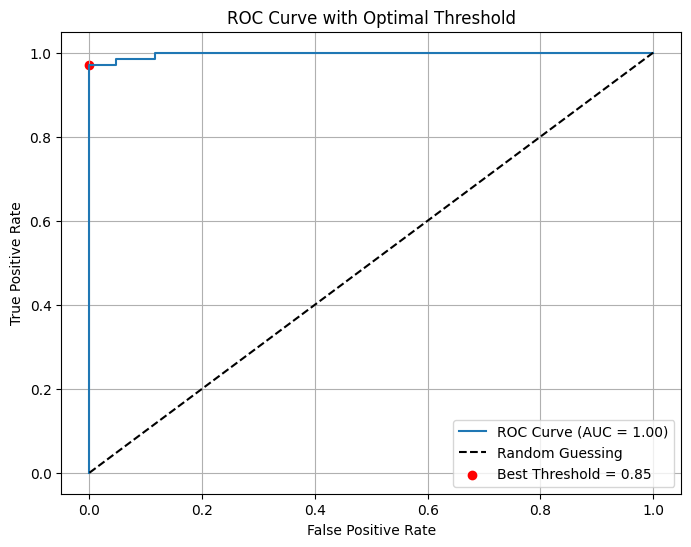

In [2]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)
print(thresholds)
print(fpr)
print(tpr)

# Compute F1 scores for all thresholds
f1_scores = []
for thresh in thresholds:
    y_pred = (y_probs >= thresh).astype(int)
    f1_scores.append(f1_score(y_test, y_pred))

# Find the best threshold
optimal_idx = np.argmax(f1_scores)
optimal_thresh = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f"Best Threshold = {optimal_thresh:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Optimal Threshold")
plt.legend()
plt.grid()
plt.show()